# | **EDA of IT Salary Survey Europa - 2020**

In this comprehensive analysis of the 2020 survey data, we delve into key demographic insights, salary trends, and workplace dynamics within the tech industry. The findings shed light on prominent patterns, offering valuable perspectives on gender distribution, age demographics, salary variations across different positions, and more.

*The following sections are outlined as follows:*
+ I. Overview

+ II. Prepping Data

+ III. Identifying and Visualizing Trends 

+ IV. Multiple correspondence analysis (MCA)

+ V. Summary 


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('coolwarm')
sns.set_theme(style='whitegrid')

%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
import os

import prince

----

## **I. Overview**

In [2]:
df = pd.read_csv('C:\Porfolio\Portfolio Source\Portfolio\IT Survey EDA\IT Salary Survey EU  2020.csv')

df.head(3)  

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN


## **II. Prepping data**


In [3]:
# Dropping unnecesery columns
df.drop(columns=[
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
    'Annual bonus+stocks one year ago. Only answer if staying in same country',
    'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'
], inplace=True)

# Renaming columns
new_column_names = {
    "Timestamp": "Date",
    "Gender": "Gender",
    "City": "City",
    "Position": "Position",
    "Total years of experience": "TotalExp",
    "Years of experience in Germany": "ExpInGermany",
    "Seniority level": "Seniority",
    "Your main technology / programming language": "MainTech",
    "Other technologies/programming languages you use often": "OtherTech",
    "Yearly brutto salary (without bonus and stocks) in EUR":"Yearly brutto salary",
    "Number of vacation days": "VacationDays",
    "Employment status": "EmploymentStatus",
    "Contract duration": "ContractDuration",
    "Main language at work": "MainLanguage",
    "Company size": "CompanySize",
    "Company type": "CompanyType",
    "Have you lost your job due to the coronavirus outbreak?": "LostJobDueToCOVID",
    "Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR": "WFHSupportAmount"
}
df.rename(columns=new_column_names, inplace=True)

# Filling NaN values and type changing
df['TotalExp'] = pd.to_numeric(df['TotalExp'], errors='coerce')
df['TotalExp'].fillna(df['TotalExp'].mean(), inplace=True)
df['ExpInGermany'] = pd.to_numeric(df['ExpInGermany'], errors='coerce')
df['ExpInGermany'].fillna(df['ExpInGermany'].mean(), inplace=True)
df['Yearly brutto salary'] = pd.to_numeric(df['Yearly brutto salary'], errors='coerce')
df['Yearly brutto salary'].fillna(df['Yearly brutto salary'].mean(), inplace=True)
df['VacationDays'] = pd.to_numeric(df['VacationDays'], errors='coerce')
df['VacationDays'].fillna(df['VacationDays'].mean(), inplace=True)
df['Yearly bonus + stocks in EUR'] = pd.to_numeric(df['Yearly bonus + stocks in EUR'], errors='coerce')
df['Yearly bonus + stocks in EUR'].fillna(df['Yearly bonus + stocks in EUR'].mean(), inplace=True)
df['WFHSupportAmount'] = pd.to_numeric(df['WFHSupportAmount'], errors='coerce')
df['WFHSupportAmount'].fillna(df['WFHSupportAmount'].mean(), inplace=True)
df['LostJobDueToCOVID'] = df['LostJobDueToCOVID'].apply(lambda x: x if x in ['Yes', 'No'] else np.nan)

# There are some incorrectly entered data and I am filtering them
df = df[df['Yearly brutto salary'] < 200000]
df = df[df['Yearly bonus + stocks in EUR'] < 200000]
df = df[df['VacationDays'] < 100]
df = df[df['WFHSupportAmount'] < 5000]

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M:%S')
df['Month'] = df['Date'].dt.month

# Create age groups
bins = [0, 19, 29, 39, 49, 59, 69, float('inf')]
age_labels = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]

df['age_group']  = pd.cut(df['Age'], bins=bins , labels=age_labels, right=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 1252
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          809 non-null    datetime64[ns]
 1   Age                           798 non-null    float64       
 2   Gender                        805 non-null    object        
 3   City                          809 non-null    object        
 4   Position                      809 non-null    object        
 5   TotalExp                      809 non-null    float64       
 6   ExpInGermany                  809 non-null    float64       
 7   Seniority                     805 non-null    object        
 8   MainTech                      752 non-null    object        
 9   OtherTech                     736 non-null    object        
 10  Yearly brutto salary          809 non-null    float64       
 11  Yearly bonus + stocks in EUR  809 no

In [5]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [6]:
df.describe()

,Date,Age,TotalExp,ExpInGermany,Yearly brutto salary,Yearly bonus + stocks in EUR,VacationDays,WFHSupportAmount,Month
count,809,798.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,2020-11-30 07:13:25.254635264,32.250627,8.680323,3.746915,71352.133659,18317.680408,28.004516,439.438525,10.918418
min,2020-11-24 11:14:15,22.000000,0.000000,0.000000,10001.000000,0.000000,0.000000,0.000000,1.000000
25%,2020-11-24 19:41:27,28.250000,5.000000,1.500000,60000.000000,0.000000,27.000000,475.540852,11.000000
50%,2020-11-25 19:33:52,32.000000,8.000000,3.000000,70000.000000,5000.000000,28.348549,475.540852,11.000000
75%,2020-11-30 19:23:52,35.000000,12.000000,5.000000,80000.000000,18000.000000,30.000000,475.540852,11.000000
max,2021-01-19 12:01:11,56.000000,31.000000,30.000000,180000.000000,170000.000000,45.000000,2000.000000,12.000000
std,NaN,5.210726,5.180691,3.412128,21872.361659,29626.173426,3.739858,311.001143,1.744374


## **III. Identifying and Visualizing Trends**

#### **Univariant analysis on *categorical* feature**

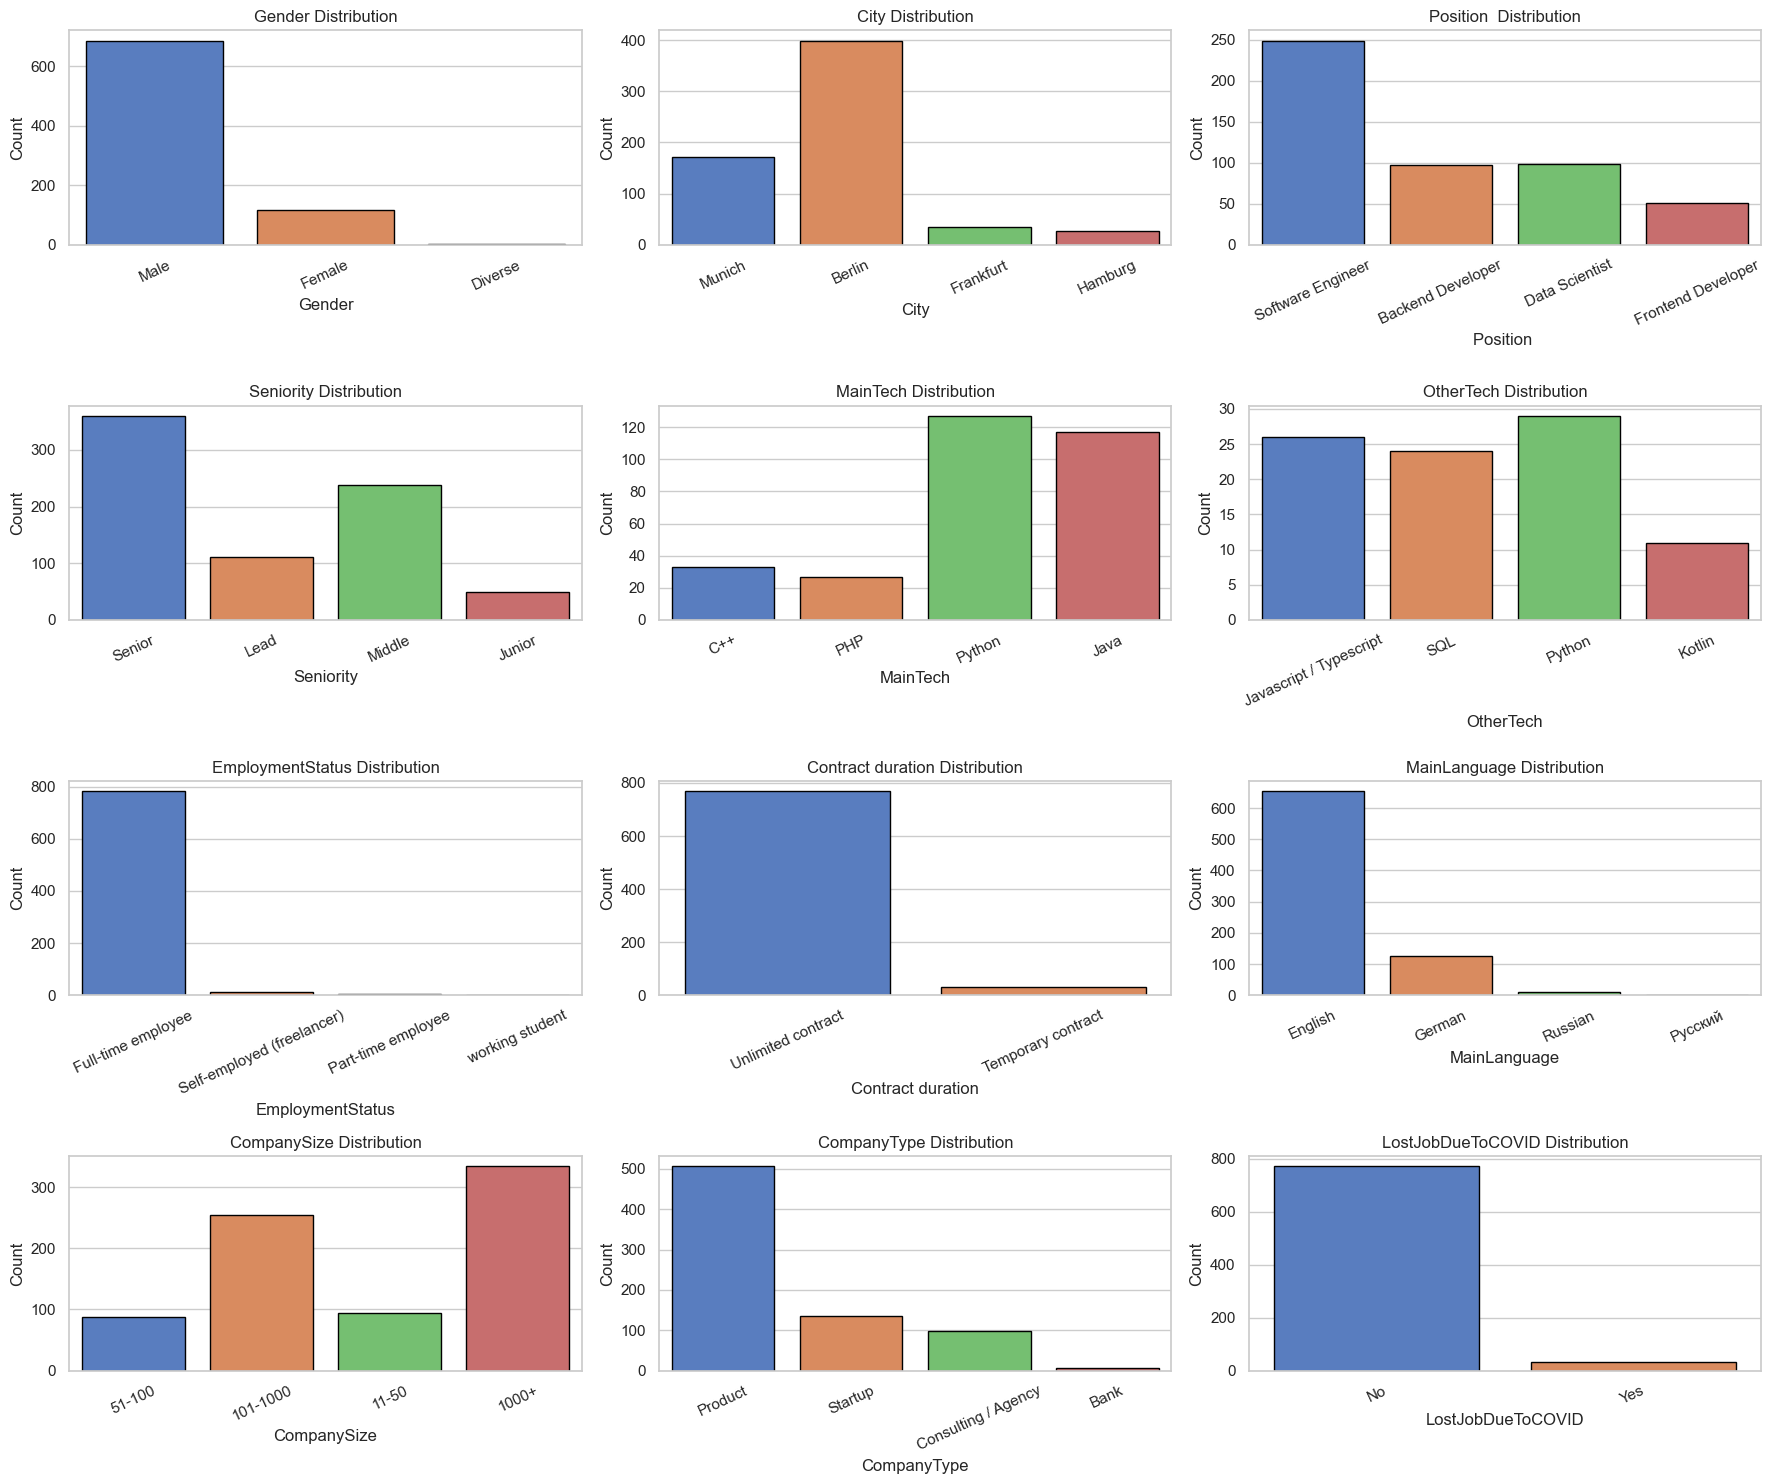

In [7]:
def plot_bar_charts(dataframe, columns, figsize=(18, 15), top_n=4):
    num_plots = len(columns)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols  

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten() 
    
    for i, column in enumerate(columns):
        ax = axes[i]
                
        top_values = dataframe[column].value_counts().nlargest(top_n).index
        filtered_data = dataframe[dataframe[column].isin(top_values)]
        
        sns.countplot(data=filtered_data, x=column, ax=ax,edgecolor='black',palette='muted')
        ax.set_title(f'{column} Distribution')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=25)
    
    
    plt.tight_layout()
    plt.show()

plot_bar_charts(df, categorical_feature)

#### **Univariant analysis on *numerical* feature**

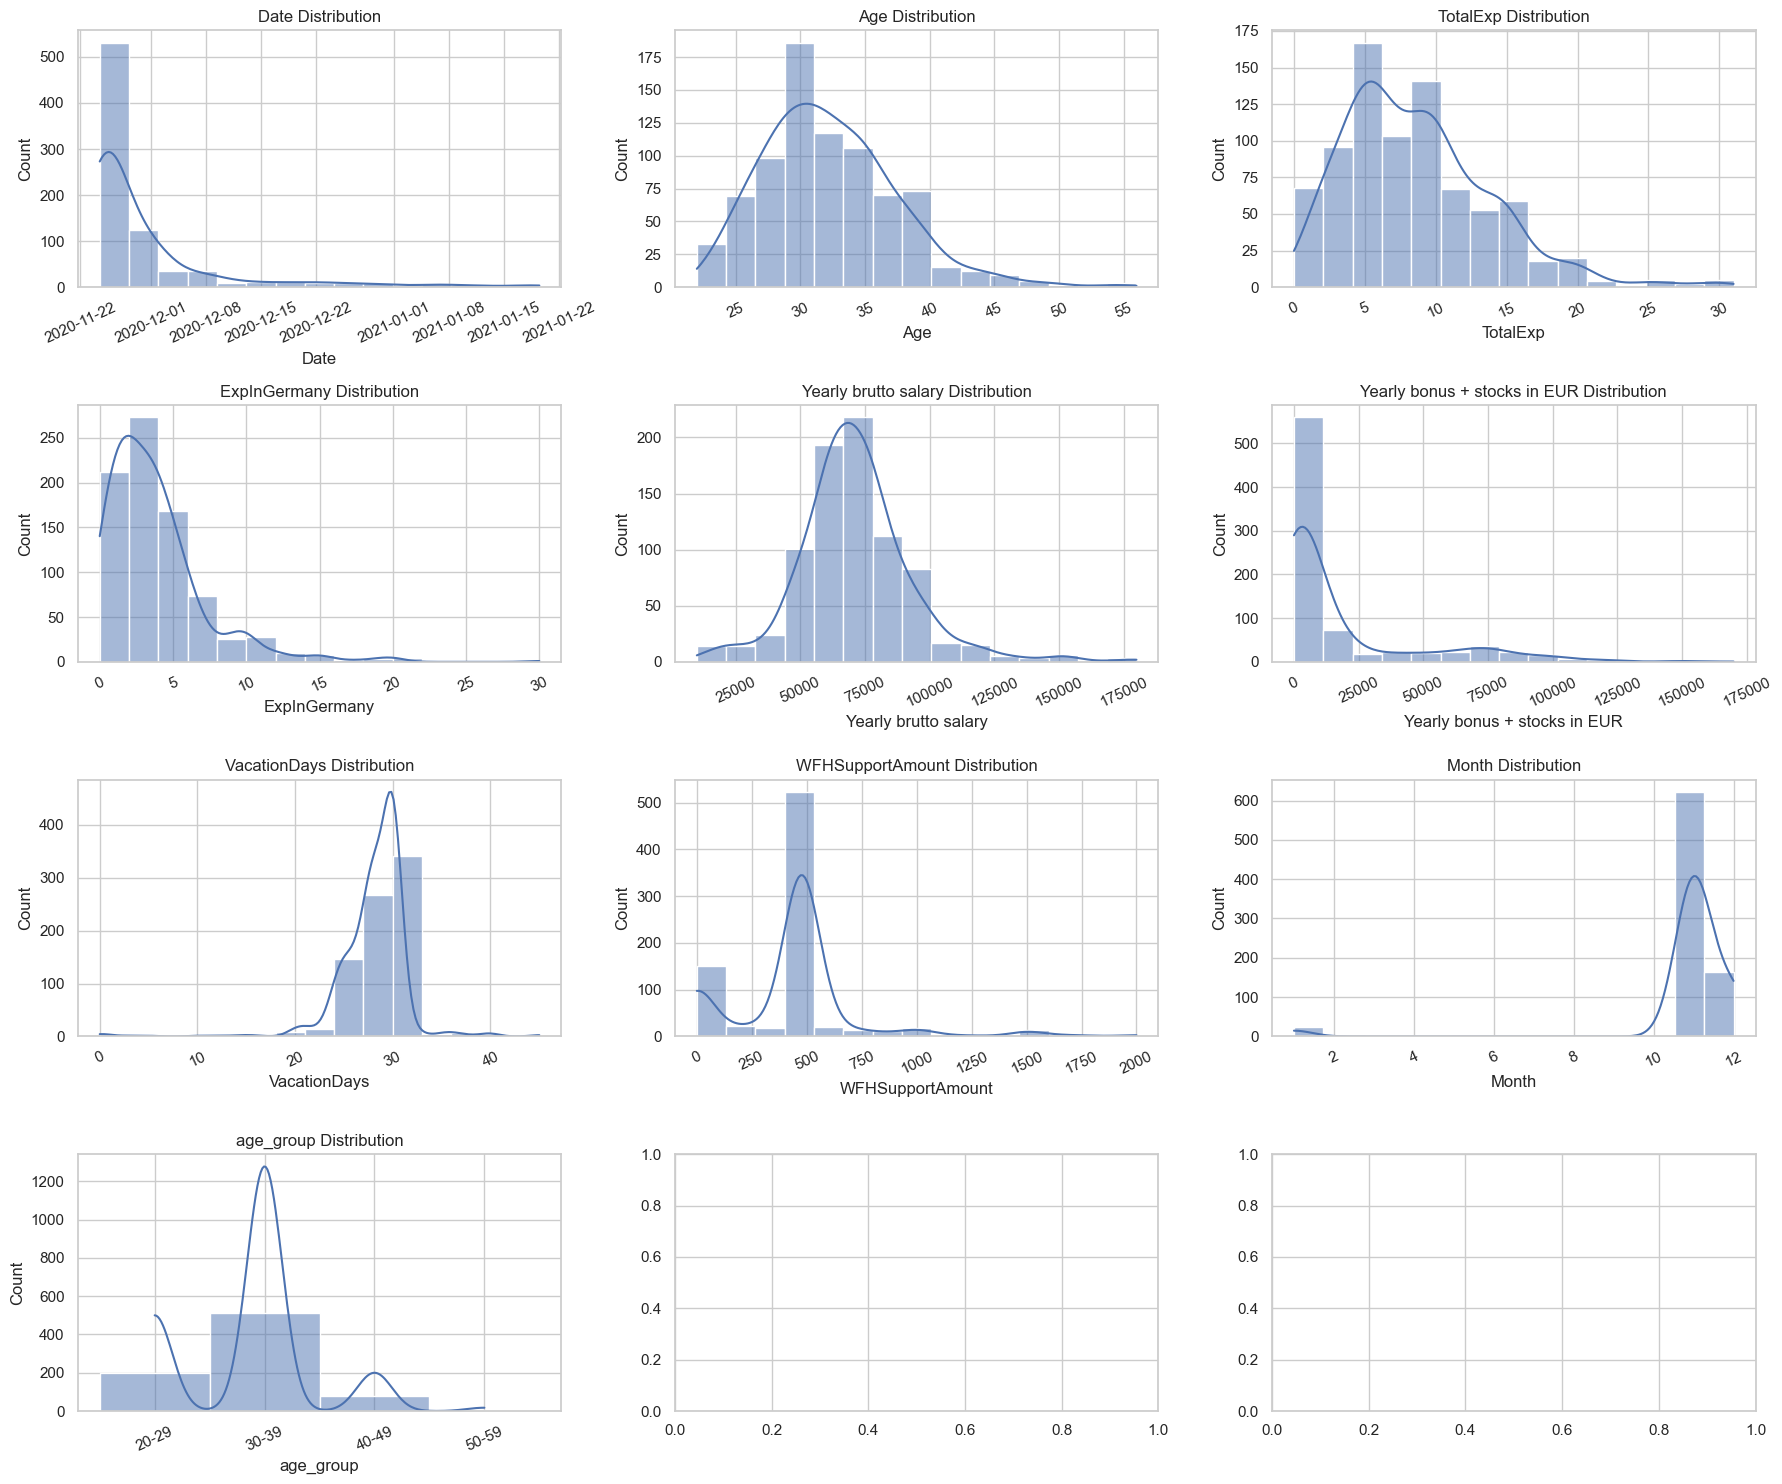

In [8]:
def plot_bar_charts(dataframe, columns, figsize=(18, 15), top_n=5):
    num_plots = len(columns)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols  
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten() 

    for i, column in enumerate(columns):
        ax = axes[i]
        
        top_values = dataframe[column].value_counts().nlargest(top_n).index
        filtered_data = dataframe[dataframe[column].isin(top_values)]
                
        sns.histplot(data=df, x=column, ax=ax,bins=15,kde=True)
        ax.set_title(f'{column} Distribution')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=25)

    plt.tight_layout()
    plt.show()

plot_bar_charts(df, numerical_features)

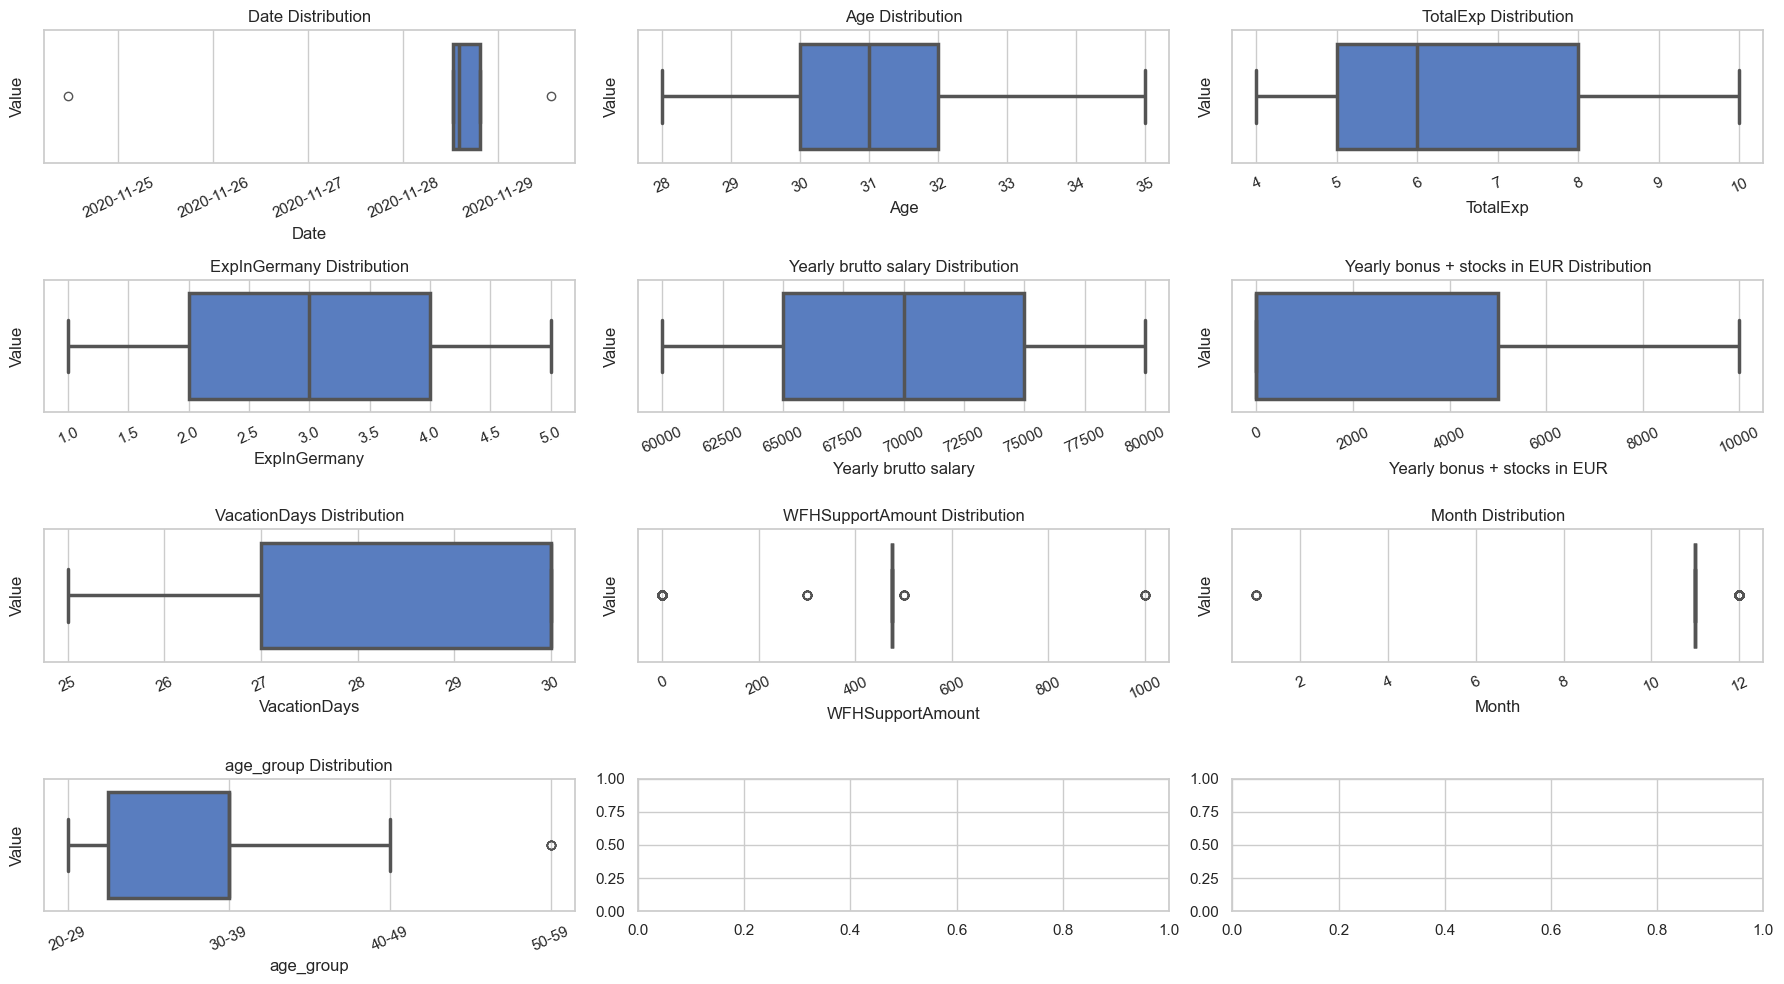

In [9]:
def plot_box_charts(dataframe, columns, figsize=(18, 10), top_n=5):
    num_plots = len(columns)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols  

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()

    for i, column in enumerate(columns):
        ax = axes[i]

        
        top_values = dataframe[column].value_counts().nlargest(top_n).index
        filtered_data = dataframe[dataframe[column].isin(top_values)]

        
        sns.boxplot(data=filtered_data, x=column, linewidth=2.5, palette='muted', ax=ax,
            flierprops=dict(marker='o', color='gray', markersize=6))

        ax.set_title(f'{column} Distribution')
        ax.set_xlabel(column)
        ax.set_ylabel('Value')
        ax.tick_params(axis='x', rotation=25)

    plt.tight_layout()
    plt.show()

plot_box_charts(df, numerical_features)


### **Multivariant analysis**

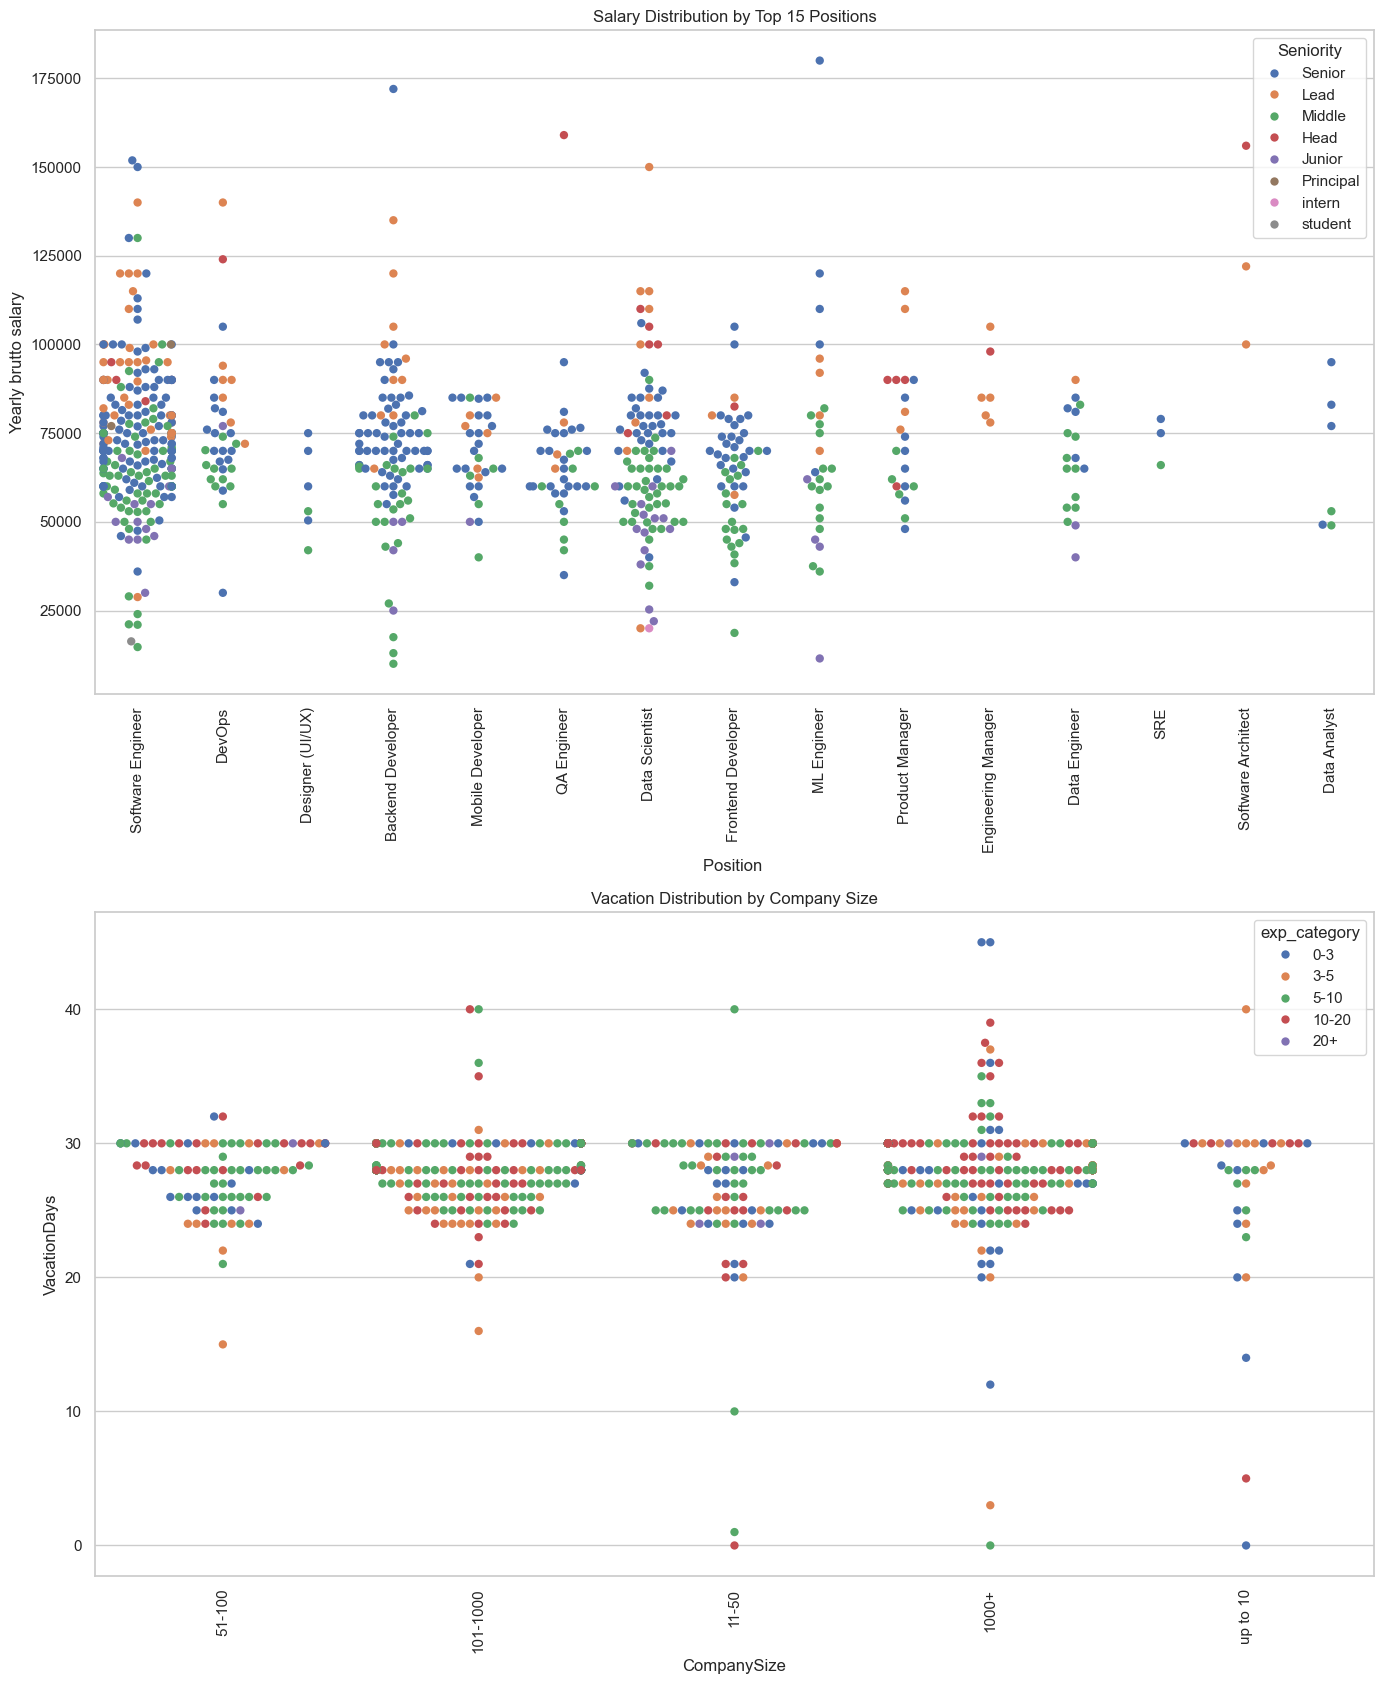

In [10]:
top_positions = df['Position '].value_counts().nlargest(15).index
filtered_df = df[df['Position '].isin(top_positions)]

bins = [0, 3, 5, 10, 20, float('inf')]  
labels = ['0-3', '3-5', '5-10', '10-20', '20+']
df['exp_category'] = pd.cut(df['TotalExp'], bins=bins, labels=labels)

fig, axes = plt.subplots(2, 1, figsize=(14, 17))  

sns.swarmplot(x='Position ', y='Yearly brutto salary', data=filtered_df, size=6, hue='Seniority', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Salary Distribution by Top 15 Positions')

sns.swarmplot(x='CompanySize', y='VacationDays', data=df, size=6, hue='exp_category', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Vacation Distribution by Company Size')

plt.tight_layout()

plt.show()


## **IV. Multiple correspondence analysis (MCA)**

Since the data is very noisy, we write a function that takes the 3 most repeating values in order to be legible.

In [11]:
categorical_columns = df.select_dtypes(include='object')  
unique_counts = categorical_columns.nunique()

print(unique_counts)

Gender                 3
City                  96
Position             118
Seniority             17
MainTech             188
OtherTech            415
EmploymentStatus       8
Сontract duration      2
MainLanguage          13
CompanySize            5
CompanyType           51
LostJobDueToCOVID      2
dtype: int64


In [22]:
def filter_top_categories(df, columns, top_n=3):
    for col in columns:
        top_categories = df[col].value_counts().nlargest(top_n).index
        df[col] = df[col].apply(lambda x: x if x in top_categories else 'Other')
    return df

In [13]:
def plot_mca(mca_df, figsize=(17, 8)):

    mca = prince.MCA(n_components=2, random_state=15)
    mca = mca.fit(mca_df)

    eigenvalues = mca.eigenvalues_
    explained_variance = eigenvalues / eigenvalues.sum()
    print(f"Explained Inertia (Varyans Payı): {explained_variance}")
    print(f"Component 1 Varyans Payı: {explained_variance[0]:.4f}")
    print(f"Component 2 Varyans Payı: {explained_variance[1]:.4f}")
    

    row_coords = mca.row_coordinates(mca_df)
    col_coords = mca.column_coordinates(mca_df)
    
    # graph
    plt.figure(figsize=figsize)
    

    plt.scatter(col_coords[0], col_coords[1], color='blue', label='Columns', alpha=0.5)
    for i, col_name in enumerate(col_coords.index):
        plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], col_name, color='blue', fontsize=10)
 
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.axvline(0, color='red', linestyle='--', linewidth=1)
    
 
    plt.title("MCA Biplot")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

filtered_df = filtered_df.astype('category')

#### + **Demographic**

Explained Inertia (Varyans Payı): [0.53818838 0.46181162]
Component 1 Varyans Payı: 0.5382
Component 2 Varyans Payı: 0.4618


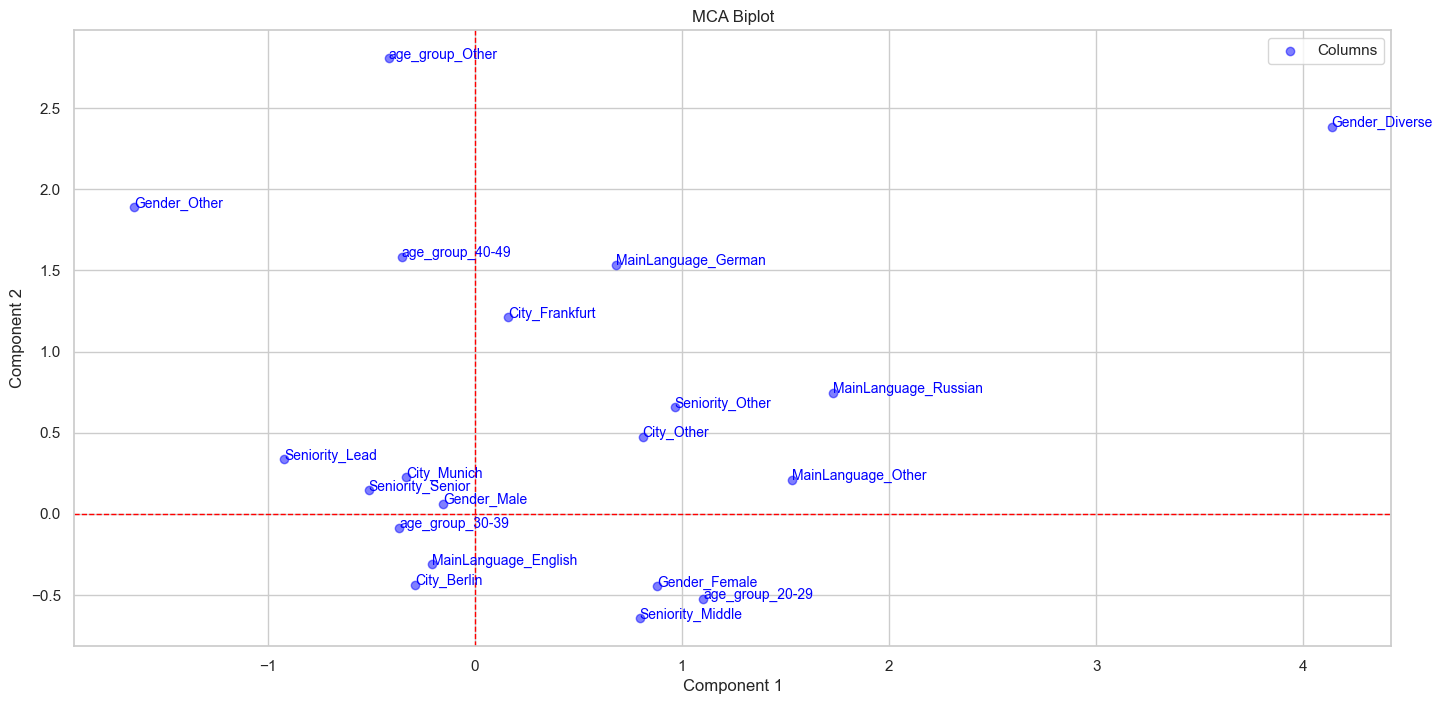

In [14]:
mca_columns = ['Gender','City', 'Seniority', 'MainLanguage','age_group']

filtered_df = filter_top_categories(df[mca_columns], mca_columns)

plot_mca(filtered_df)

#### + **Employment Status**

Explained Inertia (Varyans Payı): [0.52611887 0.47388113]
Component 1 Varyans Payı: 0.5261
Component 2 Varyans Payı: 0.4739


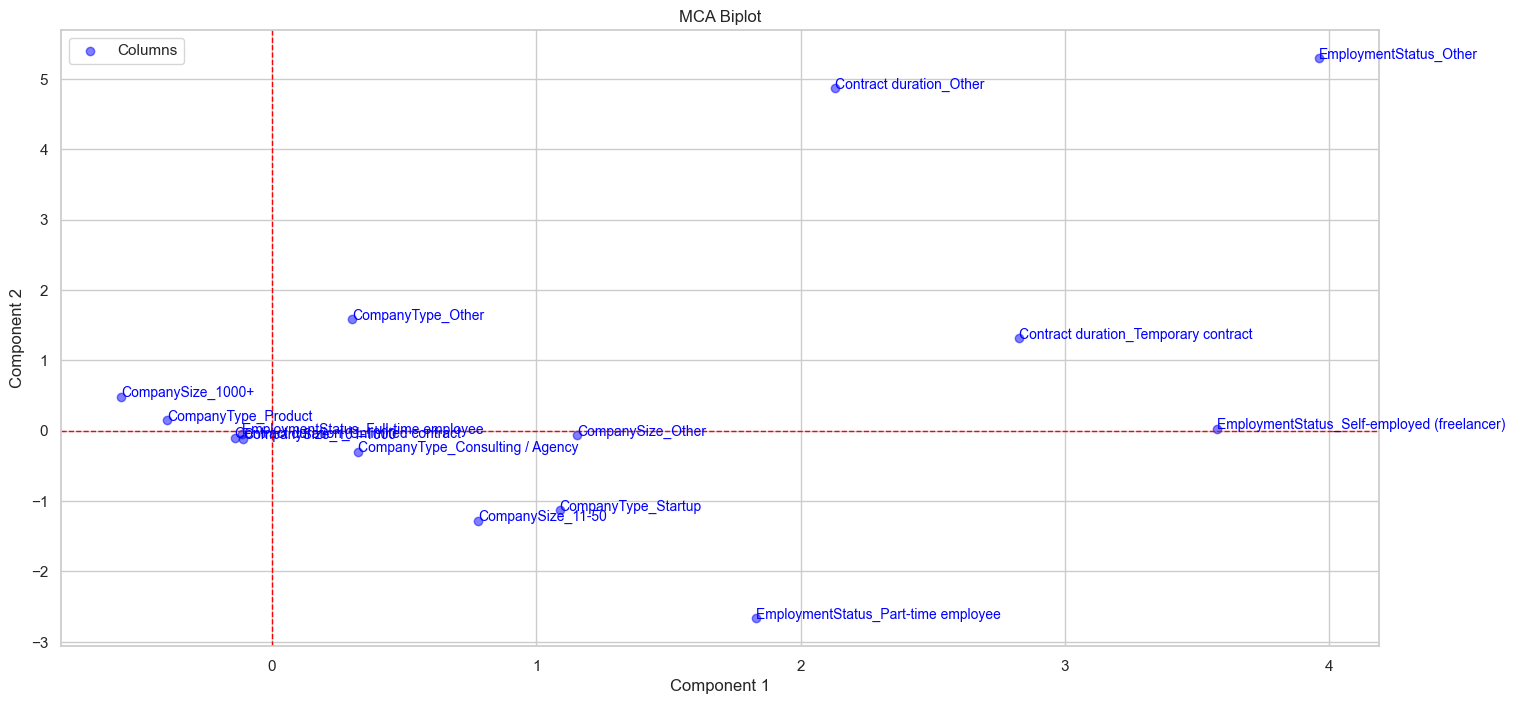

In [15]:
mca_columns = ['EmploymentStatus','Сontract duration', 'CompanySize','CompanyType']

filtered_df = filter_top_categories(df[mca_columns], mca_columns)

plot_mca(filtered_df)

#### + **Technological Capabilities**

Explained Inertia (Varyans Payı): [0.53359042 0.46640958]
Component 1 Varyans Payı: 0.5336
Component 2 Varyans Payı: 0.4664


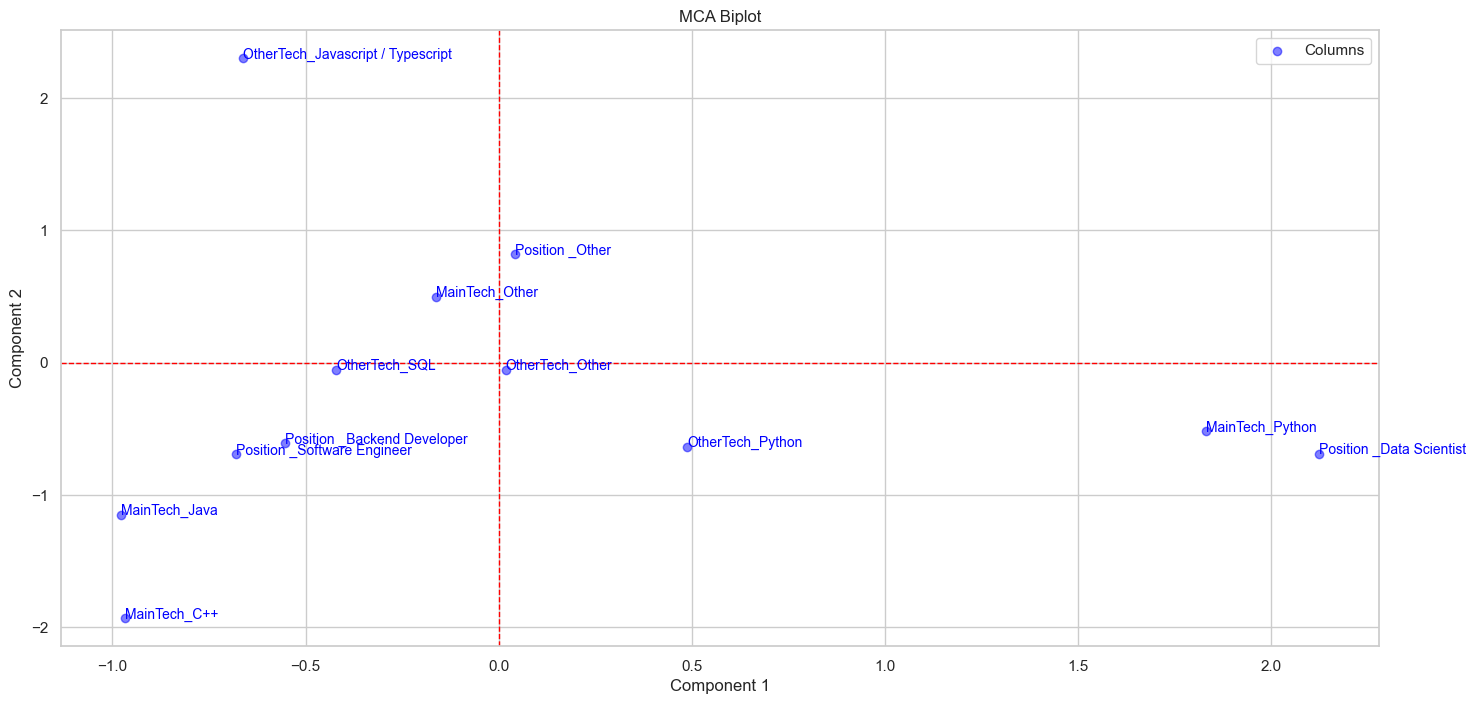

In [23]:
mca_columns = ['MainTech','OtherTech', 'Position ']

filtered_df = filter_top_categories(df[mca_columns], mca_columns)

plot_mca(filtered_df)